Mohon tunggu, sedang memuat dan memproses data...
Proses data selesai. Menggunakan 11 fitur.

--> Menampilkan visualisasi distribusi data (tutup plot untuk melanjutkan)...


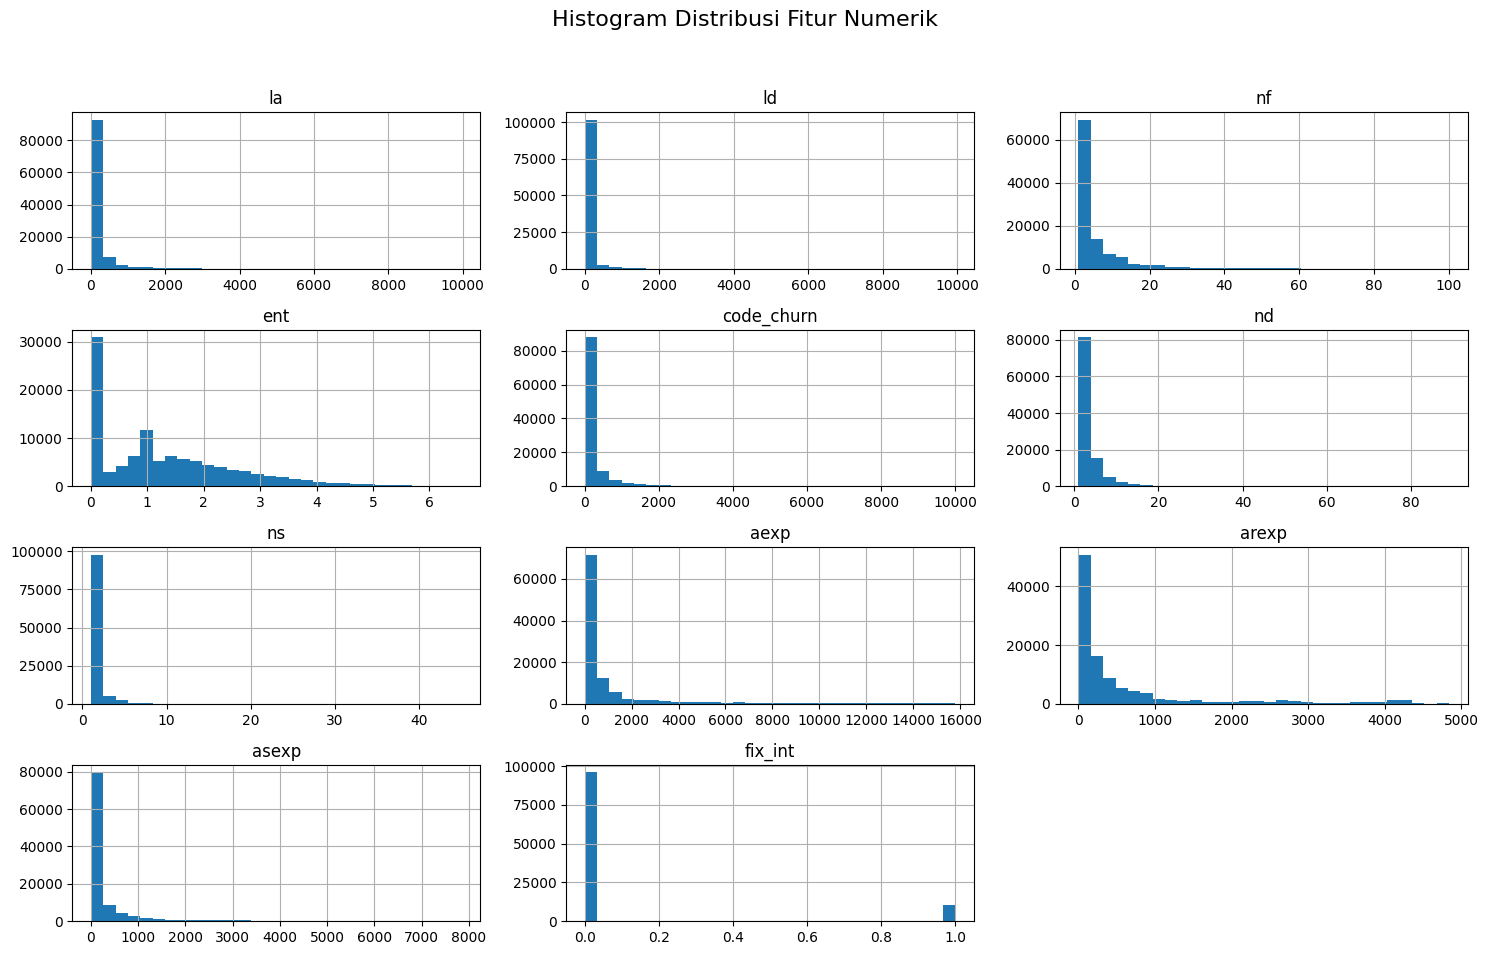

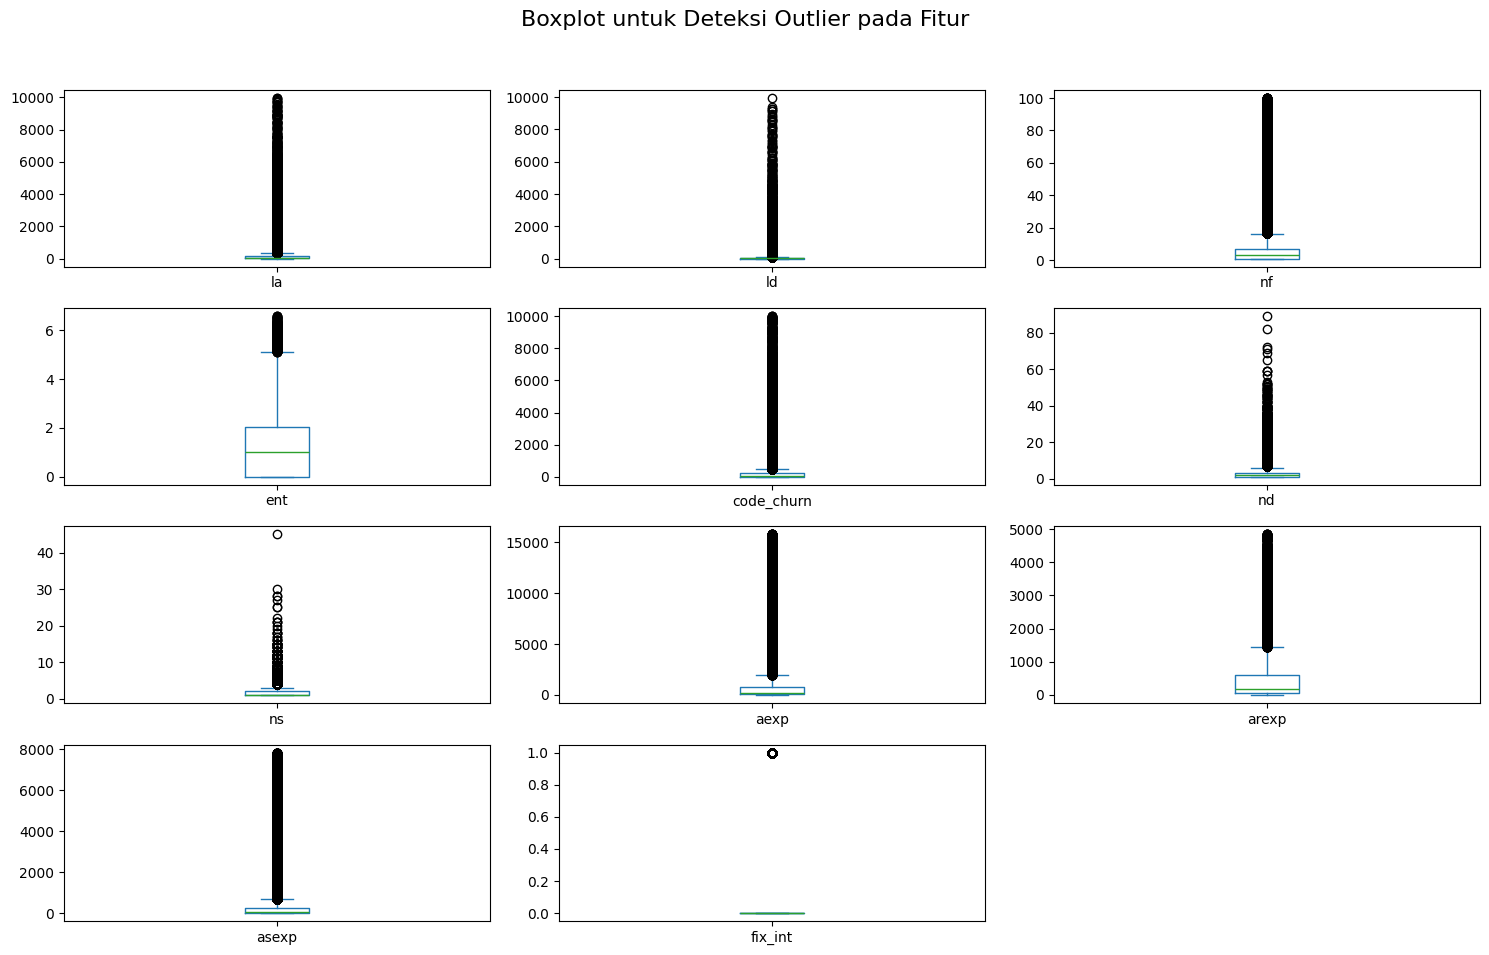

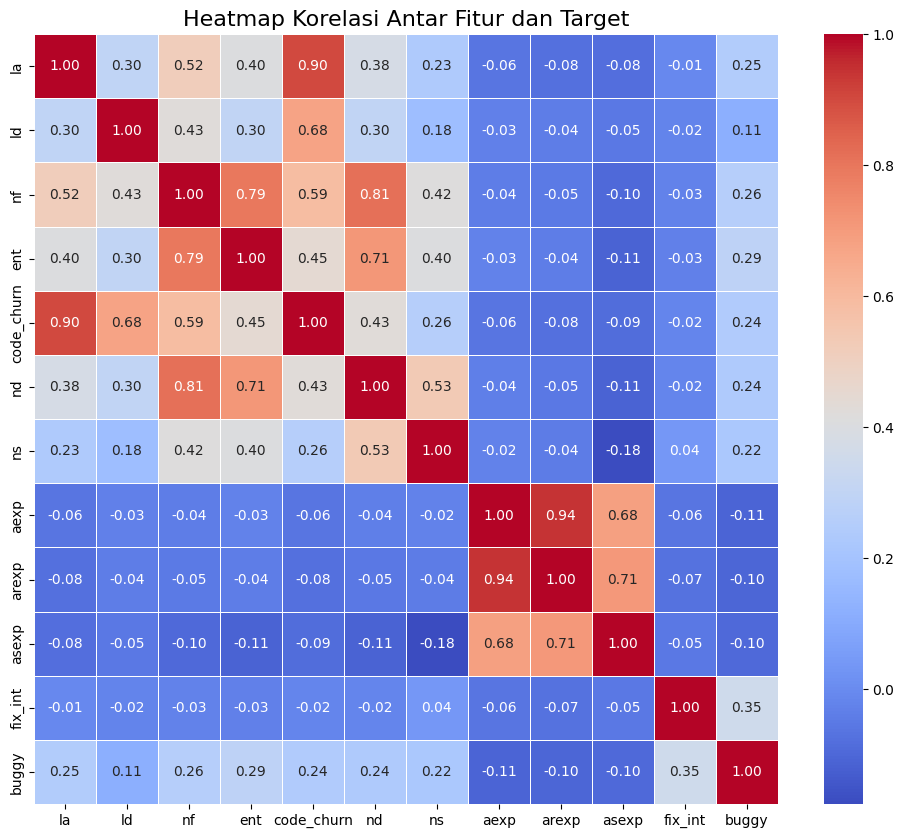


Melakukan pelatihan 5 model...
Melatih Random Forest...


/tmp/ipython-input-13-1472618111.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]))


Melatih Logistic Regression...
Melatih K-Nearest Neighbors...
Melatih LightGBM...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 22591, number of negative: 62748
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1959
[LightGBM] [Info] Number of data points in the train set: 85339, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Melatih XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:24:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pelatihan model selesai.

             HASIL ANALISIS DAN EVALUASI LENGKAP

--- A. Laporan Pra-Pemrosesan Data ---

1. Tabel Perbandingan Dataset (Sebelum vs. Sesudah)
           Kriteria Sebelum Preprocessing Sesudah Preprocessing
       Jumlah Baris               106,674               106,674
       Jumlah Kolom                    18                    20
Jumlah Nilai Kosong                     0                     0


2. Tabel Hasil Encoding dan Normalisasi

   Encoding Fitur 'fix' (boolean -> integer):
       Sebelum  Sesudah (fix_int)
False    95984              95984
True     10690              10690


   Normalisasi Fitur Numerik (5 baris pertama):

   SEBELUM Normalisasi (StandardScaler):
    la  ld  nf       ent  code_churn  nd  ns  aexp  arexp      asexp  fix_int
0  372  23   8  2.669743         395   3   3   243  243.0   0.683585        0
1    2   2   2  1.000000           4   2   1    19   19.0  14.000000        0
2   41  26   3  1.237612          67   3   2   233  233.0  

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



=== LightGBM ===
               precision    recall  f1-score   support

Not Buggy (0)       0.89      0.80      0.85     15687
    Buggy (1)       0.57      0.73      0.64      5648

     accuracy                           0.78     21335
    macro avg       0.73      0.77      0.74     21335
 weighted avg       0.81      0.78      0.79     21335

ROC AUC Score: 0.8528

=== XGBoost ===
               precision    recall  f1-score   support

Not Buggy (0)       0.89      0.81      0.85     15687
    Buggy (1)       0.58      0.73      0.64      5648

     accuracy                           0.79     21335
    macro avg       0.73      0.77      0.74     21335
 weighted avg       0.81      0.79      0.79     21335

ROC AUC Score: 0.8493


--- C. Visualisasi Hasil Evaluasi ---

--> Menampilkan Confusion Matrix untuk setiap model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


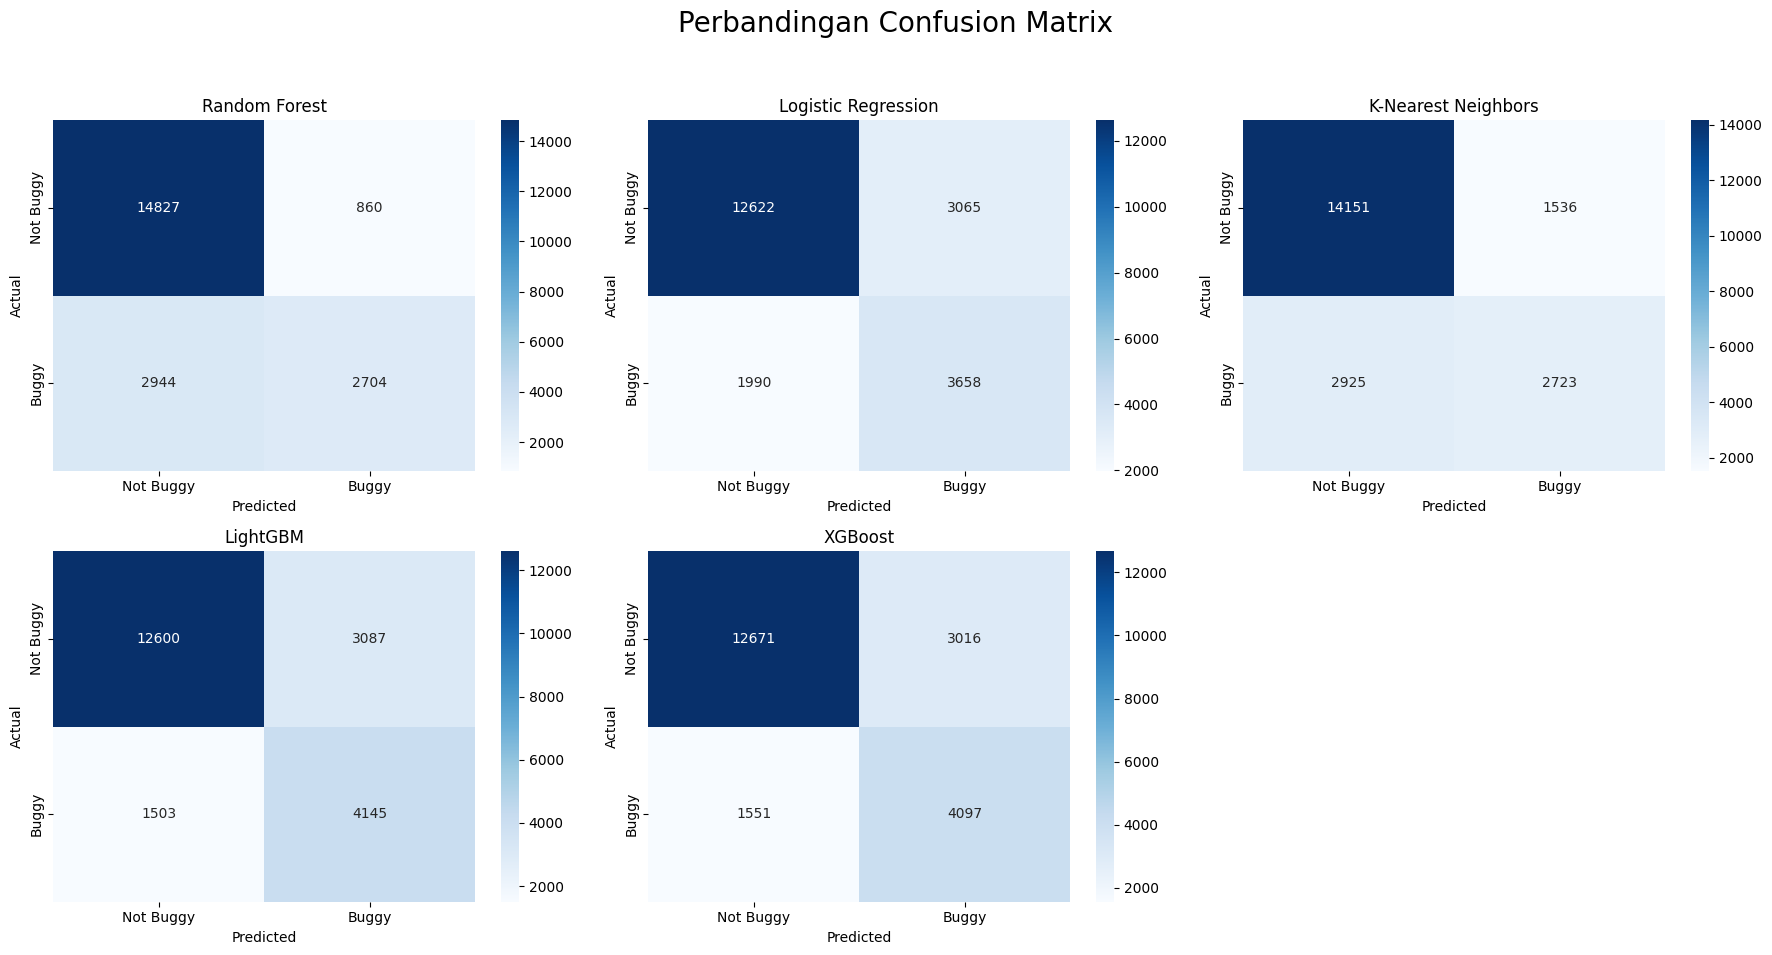


--> Menampilkan visualisasi perbandingan ROC Curve...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


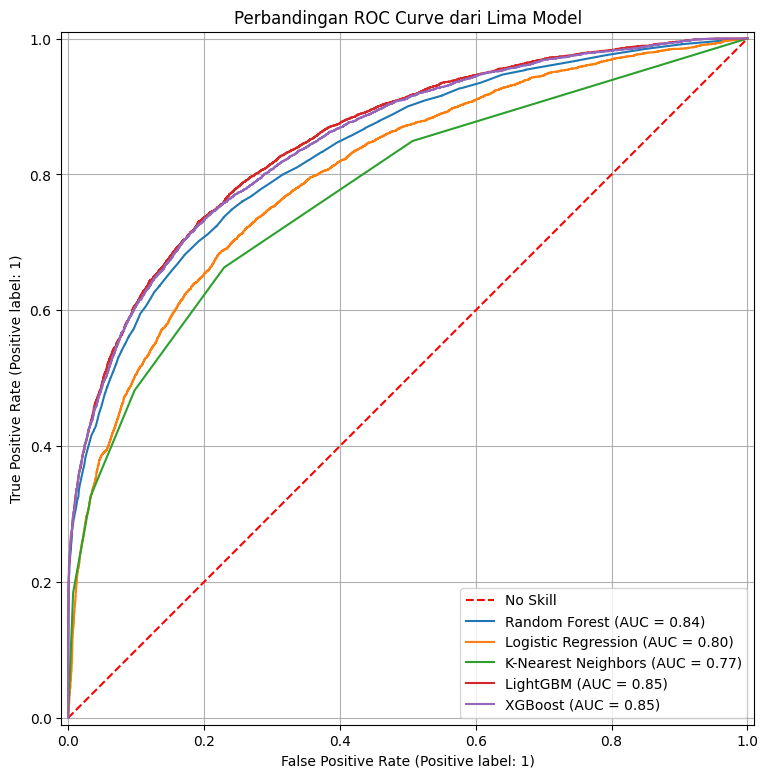


                         PROSES SELESAI


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay, confusion_matrix

# ==============================================================================
#                  LANGKAH 1: MUAT DAN PROSES DATA
# ==============================================================================
print("Mohon tunggu, sedang memuat dan memproses data...")
try:
    df_raw = pd.read_csv("apachejit_total.csv")
except FileNotFoundError:
    print("Error: File 'apachejit_train.csv' tidak ditemukan.")
    exit()

# Simpan statistik sebelum preprocessing
initial_rows, initial_cols = df_raw.shape
initial_nans = df_raw.isnull().sum().sum()

# Preprocessing dan Feature Engineering
df_processed = df_raw.dropna(subset=['la', 'ld', 'nf', 'ent', 'buggy']).copy()
df_processed['author_date'] = pd.to_datetime(df_processed['author_date'], errors='coerce')
df_processed.dropna(subset=['author_date'], inplace=True)
df_processed['code_churn'] = df_processed['la'] + df_processed['ld']
df_processed['fix_int'] = df_processed['fix'].astype(int)
new_feature_candidates = ['aexp', 'arexp', 'asexp', 'nd', 'ns']
df_processed.dropna(subset=new_feature_candidates, inplace=True)
df_processed['buggy'] = df_processed['buggy'].astype(bool)

# Daftar Fitur Lengkap
features = ['la', 'ld', 'nf', 'ent', 'code_churn', 'nd', 'ns', 'aexp', 'arexp', 'asexp', 'fix_int']
target = 'buggy'

X = df_processed[features]
y = df_processed[target]

# Simpan statistik sesudah preprocessing
final_rows, final_cols_processed = df_processed.shape
final_nans = df_processed.isnull().sum().sum()

# Normalisasi / Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features) # Buat dataframe untuk perbandingan
print(f"Proses data selesai. Menggunakan {len(features)} fitur.")


# ==============================================================================
#              LANGKAH 2 (BARU): EKSPLORASI & VISUALISASI DATA
# ==============================================================================
print("\n--> Menampilkan visualisasi distribusi data (tutup plot untuk melanjutkan)...")

# --- Visualisasi 1: Histogram untuk melihat distribusi setiap fitur ---
X.hist(bins=30, figsize=(15, 10), layout=(4, 3))
plt.suptitle("Histogram Distribusi Fitur Numerik", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Visualisasi 2: Boxplot untuk melihat outlier ---
X.plot(kind='box', subplots=True, layout=(4, 3), figsize=(15, 10), sharey=False)
plt.suptitle("Boxplot untuk Deteksi Outlier pada Fitur", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Visualisasi 3: Heatmap Korelasi ---
plt.figure(figsize=(12, 10))
# Gabungkan fitur dan target untuk melihat korelasi dengan 'buggy'
correlation_data = X.copy()
correlation_data['buggy'] = y.astype(int)
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Heatmap Korelasi Antar Fitur dan Target", fontsize=16)
plt.show()


# ==============================================================================
#                      LANGKAH 3: PELATIHAN MODEL
# ==============================================================================
print("\nMelakukan pelatihan 5 model...")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

models_dict = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1),
    "Logistic Regression": LogisticRegression(random_state=42, class_weight='balanced'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    "LightGBM": lgb.LGBMClassifier(random_state=42, class_weight='balanced'),
    "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]))
}

for name, model in models_dict.items():
    print(f"Melatih {name}...")
    model.fit(X_train, y_train)

print("Pelatihan model selesai.")


# ==============================================================================
#              LANGKAH 4: EVALUASI & TAMPILAN HASIL (DIPERBARUI)
# ==============================================================================
print("\n" + "="*70)
print("             HASIL ANALISIS DAN EVALUASI LENGKAP")
print("="*70)

# --- Bagian A: Laporan Pra-Pemrosesan (BARU) ---
print("\n--- A. Laporan Pra-Pemrosesan Data ---")

# Tabel Perbandingan Data
print("\n1. Tabel Perbandingan Dataset (Sebelum vs. Sesudah)")
comparison_data = {
    "Kriteria": ["Jumlah Baris", "Jumlah Kolom", "Jumlah Nilai Kosong"],
    "Sebelum Preprocessing": [f"{initial_rows:,}", f"{initial_cols:,}", f"{initial_nans:,}"],
    "Sesudah Preprocessing": [f"{final_rows:,}", f"{final_cols_processed:,}", f"{final_nans:,}"]
}
df_comparison = pd.DataFrame(comparison_data)
print(df_comparison.to_string(index=False))

# Tabel Hasil Encoding dan Normalisasi
print("\n\n2. Tabel Hasil Encoding dan Normalisasi")
print("\n   Encoding Fitur 'fix' (boolean -> integer):")
print(pd.concat([df_raw['fix'].value_counts(), df_processed['fix_int'].value_counts()], axis=1, keys=['Sebelum', 'Sesudah (fix_int)']).to_string())

print("\n\n   Normalisasi Fitur Numerik (5 baris pertama):")
print("\n   SEBELUM Normalisasi (StandardScaler):")
print(X.head().to_string())
print("\n   SESUDAH Normalisasi (StandardScaler):")
print(X_scaled_df.head().to_string())


# --- Bagian B: Laporan Kinerja Model (Teks) ---
print("\n\n--- B. Laporan Lengkap Kinerja Model ---")
for name, model in models_dict.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=['Not Buggy (0)', 'Buggy (1)']))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

# --- Bagian C: Visualisasi Hasil (DIPERBARUI) ---
print("\n\n--- C. Visualisasi Hasil Evaluasi ---")
print("\n--> Menampilkan Confusion Matrix untuk setiap model...")

# Confusion Matrix
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten() # Ratakan array axes agar mudah di-loop
fig.suptitle('Perbandingan Confusion Matrix', fontsize=20)

for i, (name, model) in enumerate(models_dict.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel('Predicted'); axes[i].set_ylabel('Actual')
    axes[i].set_xticklabels(['Not Buggy', 'Buggy']); axes[i].set_yticklabels(['Not Buggy', 'Buggy'])

# Sembunyikan subplot yang tidak terpakai
if len(models_dict) < len(axes):
    for j in range(len(models_dict), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ROC Curve
print("\n--> Menampilkan visualisasi perbandingan ROC Curve...")
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot([0, 1], [0, 1], 'r--', label='No Skill')
for name, model in models_dict.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=ax)
plt.title('Perbandingan ROC Curve dari Lima Model')
plt.legend()
plt.grid(True)
plt.show()

print("\n" + "="*70)
print("                         PROSES SELESAI")
print("="*70)

In [14]:
print("\n\n--- Lampiran 6: Cuplikan 10 Baris Pertama Dataset Final ---")
print(df_processed[features + [target]].head(10).to_string())



--- Lampiran 6: Cuplikan 10 Baris Pertama Dataset Final ---
    la  ld  nf       ent  code_churn  nd  ns  aexp  arexp       asexp  fix_int  buggy
0  372  23   8  2.669743         395   3   3   243  243.0    0.683585        0  False
1    2   2   2  1.000000           4   2   1    19   19.0   14.000000        0  False
2   41  26   3  1.237612          67   3   2   233  233.0    0.000606        0  False
3    8   6   2  0.591673          14   1   1    64   64.0   55.000000        0  False
4   70   4   6  2.519672          74   3   1    27   27.0   22.000000        0  False
5  104  29   7  2.313248         133   5   1   273  273.0  215.000000        0  False
6    9   0   1  0.000000           9   1   1    49   49.0   27.000000        0  False
7   58   0   1  0.000000          58   1   1    37   37.0   16.000000        0  False
8   65   0   1  0.000000          65   1   1    38   38.0   17.000000        0  False
9   19   3   2  0.439497          22   2   1    66   66.0   42.000000        0